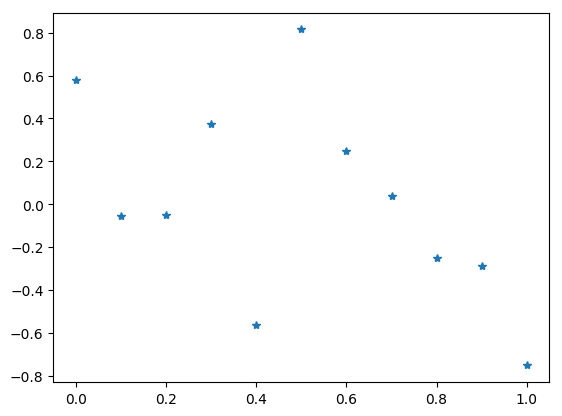

In [44]:
using Distributions, PyPlot, Polynomials

x=collect(0:.1:1);
y=0.5*rand(Normal(0,1),11);

plot(x,y,"*");

### Interpolacion polinomica

In [45]:
A=ones(size(x))

for i=1:length(x)-1
    A=[A x.^i];
end
cond(A)

1.1557524455857426e8

In [46]:
θ=A\y;
p=Poly(θ)

Poly(0.580318312258355 + 776.2654891885759*x - 21092.62390429573*x^2 + 225341.7709810805*x^3 - 1.2792463314661698e6*x^4 + 4.327826857308998e6*x^5 - 9.162919967174655e6*x^6 + 1.2257134414822109e7*x^7 - 1.0064048754591618e7*x^8 + 4.629675209500907e6*x^9 - 913448.1734021871*x^10)

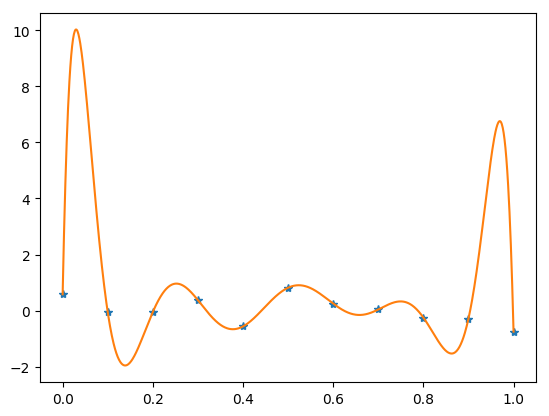

In [47]:
plot(x,y,"*")
xx=(0:.001:1)
plot(xx,p(xx));

### Lagrange Polynomials

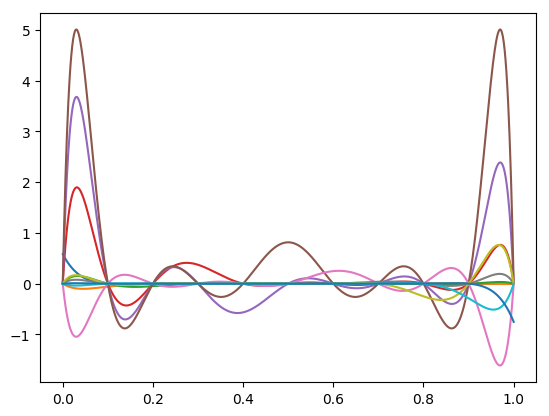

In [48]:
pp=[]
for i=1:length(x)
    push!(pp,poly([x[1:i-1];x[i+1:end]]));
    pp[i]=pp[i]*y[i]/pp[i](x[i])
    plot(xx,pp[i](xx))
end



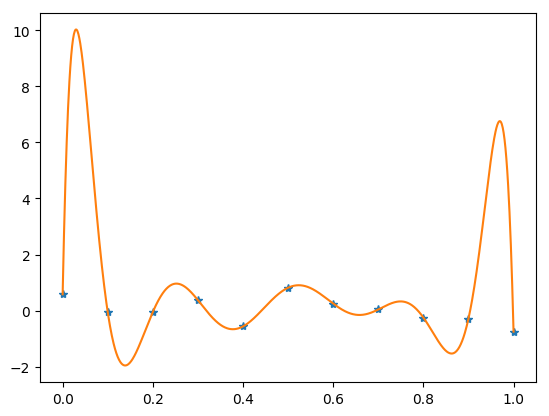

In [49]:
p = sum(pp)
plot(x,y,"*")
plot(xx,p(xx));

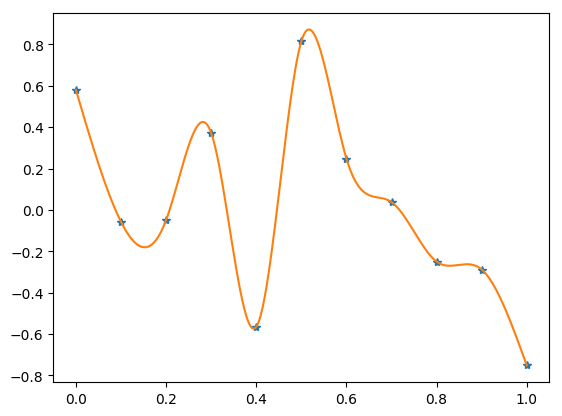

In [50]:
using Interpolations

plot(x,y,"*");
itp = interpolate(y, BSpline(Cubic(Natural())), OnGrid())
zz=1+(xx-x[1])/(xx[end]-x[1])*(length(x)-1)
yy = [itp[z] for z in zz]

plot(xx,yy);

## Comparacion

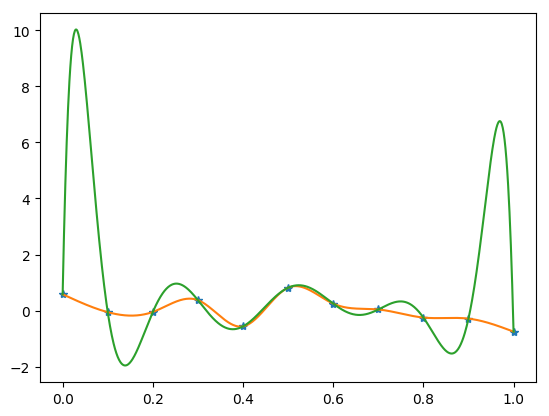

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f18526bbe90>

In [51]:
plot(x,y,"*")
plot(xx,yy)
plot(xx,p(xx))